In [1]:
import pandas as pd

train_file_list = ["GhostWriter.csv", "APT28.csv", "APT29.csv", "Gamaredon.csv", "InvisiMole.csv",
             "Sandworm.csv", "DragonFly.csv", "Turla.csv", "WizardSpider.csv", "EmberBear.csv"]
test_file = "WhisperGate.csv"
train_file = "train_dataset.csv"

TEST_ACTOR = "Unknown"
ATTRIBUTES = ['IoC Class','IoC Type','IoC Subtype','Indicator']
TARGET = "Actor"
ALL_COLUMNS = ATTRIBUTES.copy()
ALL_COLUMNS.append(TARGET) 

data_set = pd.DataFrame()

def process_data(file_list):
    global data_set
    for file in file_list:
        actor = file.split('.')[0]  # Extract the actor name from the file name
        data_file = pd.read_csv(file)
        data_file[TARGET] = actor
        #data = data.drop(columns=['Source of info'])
        #data_set = data_set.append(data, ignore_index=True)
        data_set = pd.concat([data_set, data_file[ALL_COLUMNS]], ignore_index=True)
    return data_set


In [2]:
# Process the data and save it to a CSV file with threat actor names
process_data(train_file_list).to_csv(train_file, index = False)

In [3]:
# Load train and test data from files
data_train = pd.read_csv(train_file)
data_test = pd.read_csv(test_file)
data_test = data_test.assign(Actor=TEST_ACTOR) 

TRAIN_COUNT = len(data_train.index)
TEST_COUNT = len(data_test.index)
print("Train records:", TRAIN_COUNT, "Test records:", TEST_COUNT)

data = pd.concat([data_train, data_test], ignore_index=True)

data

Train records: 2867 Test records: 49


,IoC Class,IoC Type,IoC Subtype,Indicator,Actor,Attack / Operation / Campaign,Year of attack,Source of info
0,Host,File,File hash SHA256,f86d674af9284ceb7d7ea6bd536bfd1bc66ea1cc2c0100...,GhostWriter,NaN,NaN,NaN
1,Host,File,File hash SHA256,0c15634eb43b0cbc51923a9e7ed68f1dc9639df3c53184...,GhostWriter,NaN,NaN,NaN
2,Host,File,File hash SHA256,b15d67b4a57184e5202df3c25e20dc0b7f853f4d527d14...,GhostWriter,NaN,NaN,NaN
3,Host,File,File hash SHA256,769416fa7edf38e91a55f4f7163914ee4aad9c8c890ed6...,GhostWriter,NaN,NaN,NaN
4,Host,File,File hash SHA256,744ecdf5fcc81797ffce3c85be0ab6f931c58b32ad2adb...,GhostWriter,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2911,General,MITRE Sub-technique,NaN,T1569.002,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/
2912,General,MITRE Technique,NaN,T1529,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/
2913,General,MITRE Sub-technique,NaN,T1497.001,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/
2914,General,MITRE Sub-technique,NaN,T1497.003,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/


In [4]:
# Transforming 'object' data to 'categorical' to get numerical (ordinal numbers) representation
for attr in ATTRIBUTES:
    data[attr] = data[attr].astype('category')
    data[attr] = data[attr].cat.codes
    
data[TARGET] = data[TARGET].astype('category')
data[TARGET+'_code'] = data[TARGET].cat.codes

#feature_names = data_train[['IoC Class','IoC Type','IoC Subtype','Indicator']].columns.values
actor_names = data[TARGET].cat.categories
print(actor_names)

data

Index(['APT28', 'APT29', 'DragonFly', 'EmberBear', 'Gamaredon', 'GhostWriter',
       'InvisiMole', 'Sandworm', 'Turla', 'Unknown', 'WizardSpider'],
      dtype='object')


,IoC Class,IoC Type,IoC Subtype,Indicator,Actor,Attack / Operation / Campaign,Year of attack,Source of info,Actor_code
0,3,7,7,2123,GhostWriter,NaN,NaN,NaN,5
1,3,7,7,119,GhostWriter,NaN,NaN,NaN,5
2,3,7,7,1814,GhostWriter,NaN,NaN,NaN,5
3,3,7,7,762,GhostWriter,NaN,NaN,NaN,5
4,3,7,7,746,GhostWriter,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...
2911,1,12,-1,1623,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/,9
2912,1,13,-1,1574,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/,9
2913,1,12,-1,1565,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/,9
2914,1,12,-1,1566,Unknown,NaN,NaN,https://attack.mitre.org/software/S0689/,9


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 

X_raw = data[ATTRIBUTES].values
X = min_max_scaler.fit_transform(X_raw)
y = data[TARGET+'_code'].values

X

array([[0.57142857, 0.26666667, 0.44444444, 0.84386174],
       [0.57142857, 0.26666667, 0.44444444, 0.0476758 ],
       [0.57142857, 0.26666667, 0.44444444, 0.72109654],
       ...,
       [0.28571429, 0.43333333, 0.        , 0.62216925],
       [0.28571429, 0.43333333, 0.        , 0.62256655],
       [0.28571429, 0.46666667, 0.        , 0.59952324]])

In [6]:
X_train = X[:TRAIN_COUNT]
y_train = y[:TRAIN_COUNT]
X_test = X[TRAIN_COUNT:]
#y_test = y[TRAIN_COUNT:]


In [13]:
import matplotlib.pyplot as plt

class APTClassifier: 
    def __init__(self, name_, classifier_):
        self.name = name_
        self.classifier = classifier_
        #self.y_predict = []
        
    def train(self, X_, y_):
        self.classifier.fit(X_, y_)
    
    def predict(self, X_test_):
        self.predicted_actors = self.classifier.predict(X_test_)
        
    def evaluate(self):
        accuracy = pd.Series(dtype=int)
        match_counts = pd.Series(dtype=int)
        pred_count = len(self.predicted_actors)

        # Init counters for all threat actors except the Test (Unknown) Actor
        for name in actor_names:
            if name != TEST_ACTOR:
                match_counts[name] = 0

        for i, value in enumerate(self.predicted_actors):
            pred_actor = actor_names[value]  # Get the actual actor name from the dataset using the found index
            if pred_actor in match_counts:
                match_counts[pred_actor] += 1
            else:
                print("Error: unknown TA's ID:", pred_actor)

        for name in actor_names:
            if name != TEST_ACTOR:
                if name not in match_counts:
                    match_counts[name] = 0
                accuracy[name] = match_counts[name]/pred_count*100 

        stat_actors = pd.concat([accuracy], axis=1)
        stat_actors.columns = ['Accuracy']
        self.evaluation = stat_actors
        return self.evaluation


    def draw(self, classifier_name_):
        # Plot the bar chart
        plt.figure(figsize=(200, 120))
        plt.rcParams["figure.dpi"] = 125
        self.evaluation.plot(kind='bar', rot=0)
        plt.title("Predictions for each threat actor with " + classifier_name_)
        plt.xlabel("Actor")
        plt.ylabel("%")
        plt.legend(["Attribution likelihood"])
        plt.draw()
        plt.xticks(rotation=45)
        plt.show()
        
    def print_report(self):
        print("===", self.name, "===")
        print(self.evaluation)
        #print("The most probable TA is:")

        
        
class APTClassifierCollection:
    def __init__(self):
        self.classifiers = []
        self.eval_results = pd.DataFrame()

    def add(self, classifier_):
        self.classifiers.append(classifier_)
        
    def run(self, X_, y_, X_test_):
        for r in self.classifiers:
            r.train(X_, y_)
            r.predict(X_test_)
            eval_res = r.evaluate()
            r.print_report()
            r.draw(r.name)
            self.eval_results[r.name] = eval_res['Accuracy']
    
    def get_by_name(self, name_):
        for r in self.classifiers:
            if r.name == name_:
                return r

    def print_eval_results(self):
        print(self.eval_results)

    def get_results(self):
        # Plot the bar chart
        return self.eval_results
        


=== KNN ===
               Accuracy
APT28          4.081633
APT29          8.163265
DragonFly      8.163265
EmberBear     34.693878
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     2.040816
Sandworm      22.448980
Turla          6.122449
WizardSpider  14.285714


<Figure size 25000x15000 with 0 Axes>

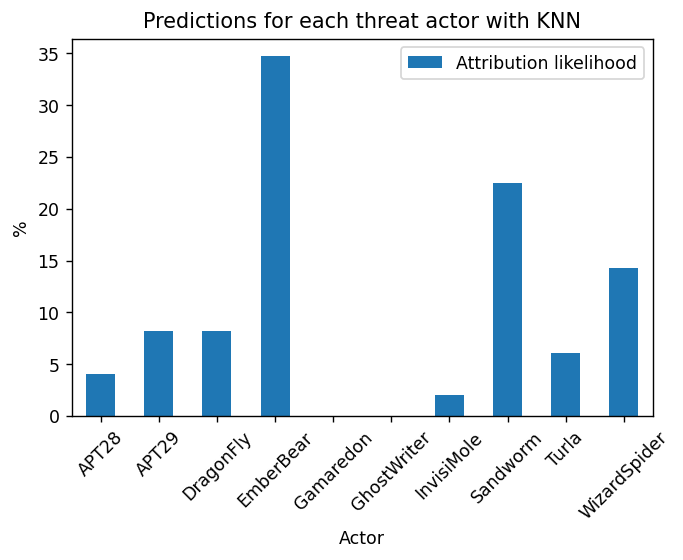

=== Decision Tree ===
               Accuracy
APT28          4.081633
APT29          2.040816
DragonFly      2.040816
EmberBear     36.734694
Gamaredon      4.081633
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      30.612245
Turla          4.081633
WizardSpider  16.326531


<Figure size 25000x15000 with 0 Axes>

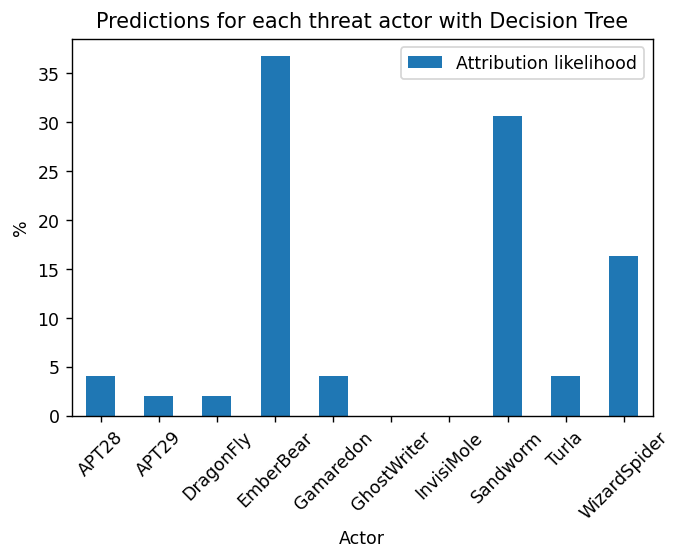

=== Random Forest ===
               Accuracy
APT28          2.040816
APT29          2.040816
DragonFly      4.081633
EmberBear     28.571429
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      32.653061
Turla          6.122449
WizardSpider  24.489796


<Figure size 25000x15000 with 0 Axes>

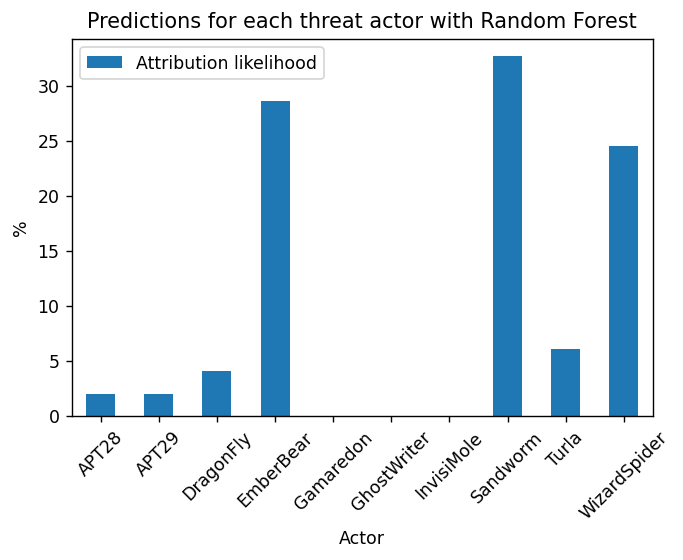

=== AdaBoost ===
               Accuracy
APT28          2.040816
APT29          0.000000
DragonFly      4.081633
EmberBear      0.000000
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      93.877551
Turla          0.000000
WizardSpider   0.000000


<Figure size 25000x15000 with 0 Axes>

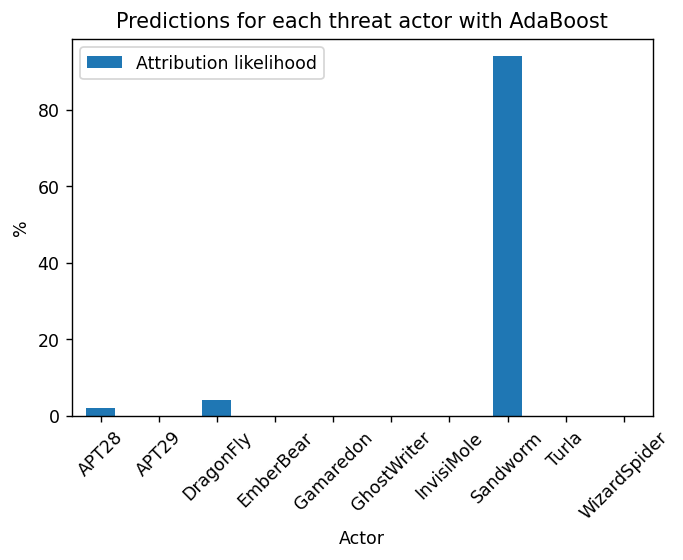

=== Linear SVM ===
               Accuracy
APT28          4.081633
APT29          0.000000
DragonFly      2.040816
EmberBear      0.000000
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      89.795918
Turla          4.081633
WizardSpider   0.000000


<Figure size 25000x15000 with 0 Axes>

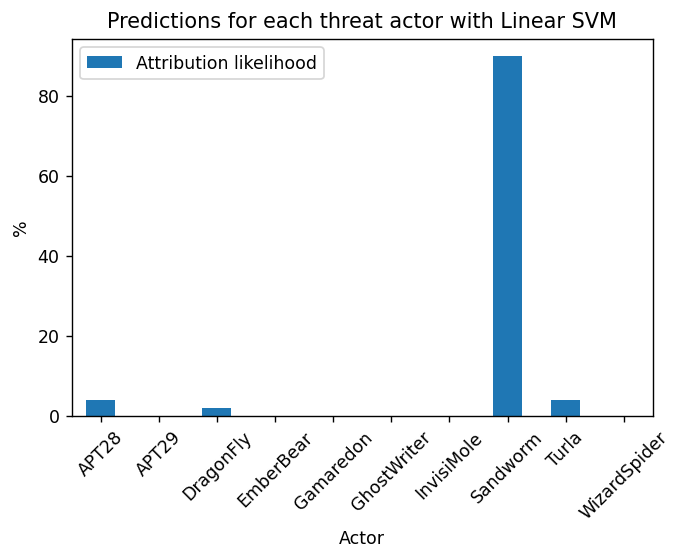

=== RBF SVM ===
               Accuracy
APT28          0.000000
APT29          4.081633
DragonFly      6.122449
EmberBear      6.122449
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      69.387755
Turla          2.040816
WizardSpider  12.244898


<Figure size 25000x15000 with 0 Axes>

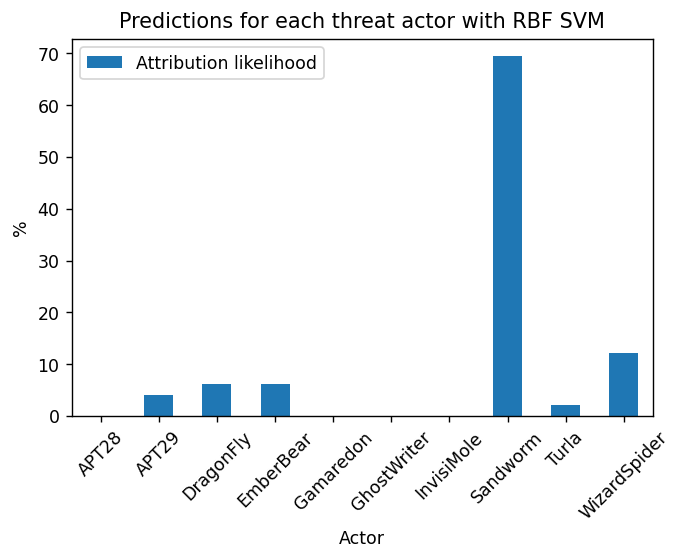

=== GaussianNB ===
               Accuracy
APT28          0.000000
APT29          0.000000
DragonFly      8.163265
EmberBear     91.836735
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm       0.000000
Turla          0.000000
WizardSpider   0.000000


<Figure size 25000x15000 with 0 Axes>

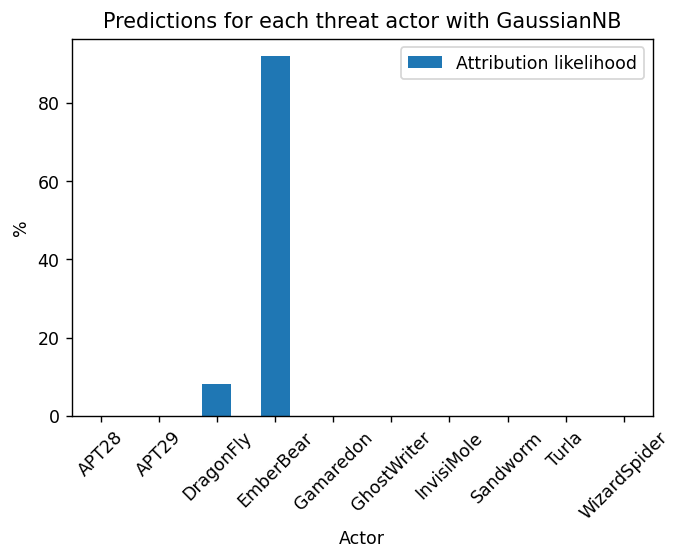

=== Neural Net ===
               Accuracy
APT28          0.000000
APT29          0.000000
DragonFly      4.081633
EmberBear      0.000000
Gamaredon      0.000000
GhostWriter    0.000000
InvisiMole     0.000000
Sandworm      91.836735
Turla          4.081633
WizardSpider   0.000000


<Figure size 25000x15000 with 0 Axes>

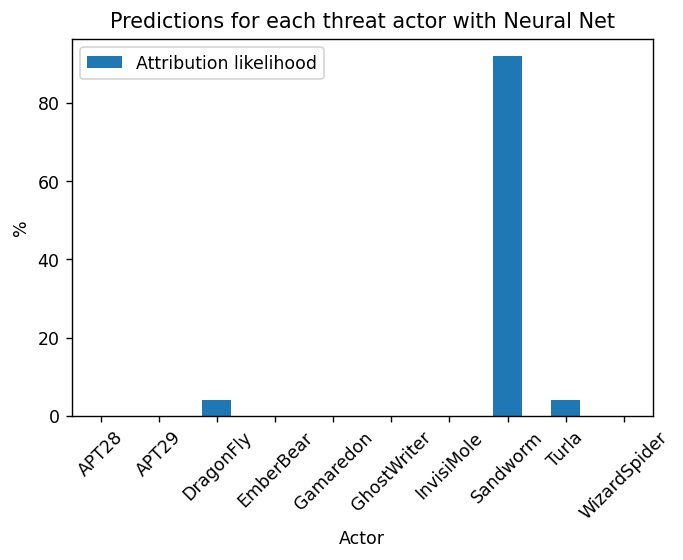

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF


APT_CC = APTClassifierCollection()

APT_CC.add(APTClassifier("KNN", KNeighborsClassifier(n_neighbors=3) ))
APT_CC.add(APTClassifier("Decision Tree", DecisionTreeClassifier() ))
APT_CC.add(APTClassifier("Random Forest", RandomForestClassifier() ))
APT_CC.add(APTClassifier("AdaBoost", AdaBoostClassifier(algorithm="SAMME") ))
APT_CC.add(APTClassifier("Linear SVM", SVC(kernel="linear", C=0.3) ))
APT_CC.add(APTClassifier("RBF SVM", SVC(gamma=2, C=1) ))
APT_CC.add(APTClassifier("GaussianNB",  GaussianNB() ))
APT_CC.add(APTClassifier("Neural Net", MLPClassifier(alpha=1, max_iter=1000) ))


APT_CC.run(X_train, y_train, X_test)

In [9]:
#pd.set_option('display.max_columns',1504)
pd.set_option('display.width',200)
APT_CC.print_eval_results()

                    KNN  Decision Tree  Random Forest   AdaBoost  Linear SVM    RBF SVM  GaussianNB  Neural Net
APT28          4.081633       2.040816       2.040816   2.040816    4.081633   0.000000    0.000000    0.000000
APT29          8.163265       2.040816       2.040816   0.000000    0.000000   4.081633    0.000000    0.000000
DragonFly      8.163265       2.040816       2.040816   4.081633    2.040816   6.122449    8.163265    4.081633
EmberBear     34.693878      36.734694      30.612245   0.000000    0.000000   6.122449   91.836735    0.000000
Gamaredon      0.000000       4.081633       0.000000   0.000000    0.000000   0.000000    0.000000    0.000000
GhostWriter    0.000000       0.000000       0.000000   0.000000    0.000000   0.000000    0.000000    0.000000
InvisiMole     2.040816       2.040816       0.000000   0.000000    0.000000   0.000000    0.000000    0.000000
Sandworm      22.448980      30.612245      38.775510  93.877551   89.795918  69.387755    0.000000   91

<Figure size 75000x15000 with 0 Axes>

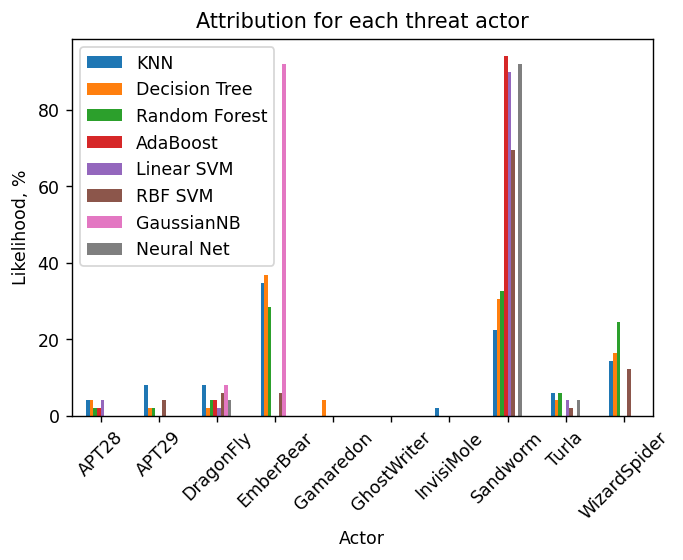

In [16]:
er = APT_CC.get_results()

plt.figure(figsize=(600, 120))
plt.rcParams["figure.dpi"] = 125
er.plot(kind='bar', rot=0)
plt.title("Attribution for each threat actor")
plt.xlabel("Actor")
plt.ylabel("Likelihood, %")
plt.legend(er.columns)
plt.draw()
plt.xticks(rotation=45)
plt.show()

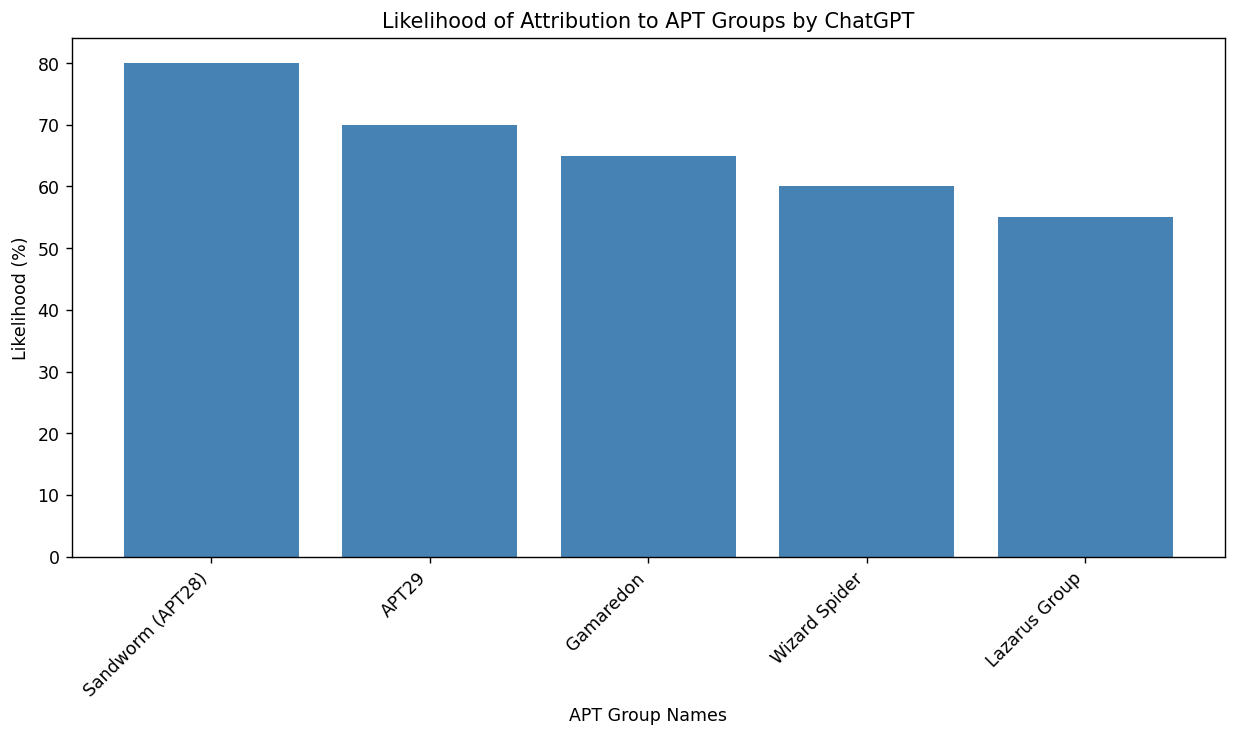

In [18]:
# Data for APT groups and their likelihoods
apt_groups = ['Sandworm (APT28)', 'APT29', 'Gamaredon', 'Wizard Spider', 'Lazarus Group']
likelihoods = [80, 70, 65, 60, 55]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(apt_groups, likelihoods, color='steelblue')
plt.xlabel('APT Group Names')
plt.ylabel('Likelihood (%)')
plt.title('Likelihood of Attribution to APT Groups by ChatGPT')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()